# Meteostat JSON API

Obtener datos de temperatura a nivel diario de las provincias de la Republica Dominicana.

In [1]:
pip install meteostat

  Using cached meteostat-1.6.5-py3-none-any.whl (31 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Monthly, Hourly
pd.set_option('display.float_format', np.format_float_positional)

Dataset de provincias creado

In [3]:
provincias = pd.read_excel("Listado de provincias.xlsx", sheet_name="Provincias")
provincias.head()

,COD,DESCRIPCION,LON,LAT
0,1,DISTRITO NACIONAL,18.4855733122314,-69.931946240697
1,2,LA ALTAGRACIA,18.6275106168221,-68.4674591068167
2,3,AZUA,18.4536182121849,-70.7351759521888
3,4,BAHORUCO,18.4895235661208,-71.4180457536132
4,5,BARAHONA,18.2127826548071,-71.1025569259113


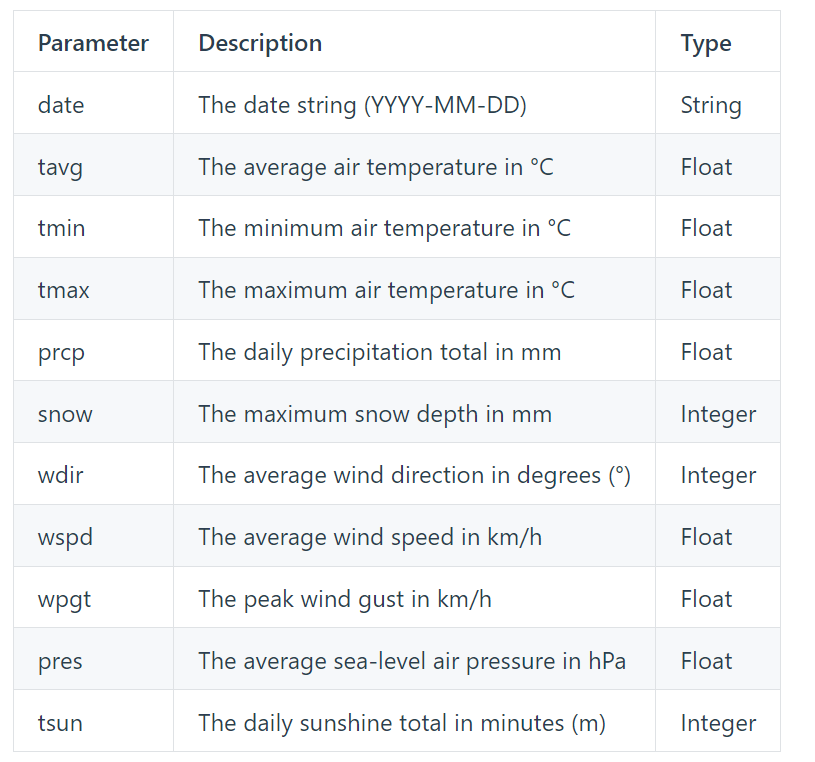

Daily data can be queried for a maximum of 10 years per request.

In [5]:
# Definir las fechas relevantes de analisis
start = datetime(2014, 7, 1)
end = datetime(2022, 12, 31, 23, 59)

In [6]:
data_concat = pd.DataFrame()

for index, row in provincias.iterrows():
    descripcion = row['DESCRIPCION']
    lon = row['LON']
    lat = row['LAT']
    prov_name = Point(lon, lat) # Elevation above sea level for SD set to 14 meters, which is approximately 46 feet above sea level.
    # Get daily data for the defined time range
    data_raw = Hourly(prov_name, start, end)
    data_raw = data_raw.fetch()
    data_raw['DESCRIPCION'] = descripcion
    data_raw['LON'] = lon
    data_raw['LAT'] = lat
    data_raw = data_raw.reset_index()
    data_concat = pd.concat([data_concat, data_raw], axis=0)

data_concat.drop(columns="index", inplace=True)
data_concat

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,DESCRIPCION,LON,LAT
0,2014-07-10 15:00:00,30.4,23.1,65.,NaN,NaN,90.,10.8,NaN,1019.3,NaN,NaN,DISTRITO NACIONAL,18.4855733122314,-69.931946240697
1,2014-07-10 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISTRITO NACIONAL,18.4855733122314,-69.931946240697
2,2014-07-10 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISTRITO NACIONAL,18.4855733122314,-69.931946240697
3,2014-07-10 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISTRITO NACIONAL,18.4855733122314,-69.931946240697
4,2014-07-10 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISTRITO NACIONAL,18.4855733122314,-69.931946240697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74308,2022-12-31 19:00:00,28.2,19.4,59.,0.1,NaN,60.,9.7,NaN,1016.6,NaN,17.,SANTO DOMINGO,18.5571945637294,-69.8981304594399
74309,2022-12-31 20:00:00,27.3,19.6,63.,0.1,NaN,31.,6.5,NaN,1016.5,NaN,17.,SANTO DOMINGO,18.5571945637294,-69.8981304594399
74310,2022-12-31 21:00:00,26.7,20.1,67.,0.1,NaN,19.,3.2,NaN,1016.4,NaN,17.,SANTO DOMINGO,18.5571945637294,-69.8981304594399
74311,2022-12-31 22:00:00,25.3,22.4,84.,0.,NaN,2.,2.5,NaN,1016.7,NaN,3.,SANTO DOMINGO,18.5571945637294,-69.8981304594399


In [ ]:
# Plot line chart including average, minimum and maximum temperature
data_concat.plot(x='time', y=['tavg', 'tmin', 'tmax'])
plt.title("Historico de la temperatura en RD")
plt.show()

In [8]:
data_concat.to_excel("data/MeteostatData_test_Hourly.xlsx", index=False, sheet_name="ProvinciasHistorico")